In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load train data
df = pd.read_csv(r'C:\Machine Hack-mathco.thon\train.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# Copy of train set
df2 = df.copy()

# drop rows which are similar, keeping only first occurance of repeated ones
df2.drop_duplicates(keep='first', inplace=True)

#DROPPING OUTLIER
df2.drop(16983, axis=0, inplace=True)

## Check for null values 

In [5]:
df.isnull().sum().sort_values(ascending=False)

Airbags             0
Color               0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
ID                  0
dtype: int64

## Unique values in each column(features) 

In [6]:
for i in df.columns:
    print(len(df[i].unique()), i)

18924 ID
2315 Price
559 Levy
65 Manufacturer
1590 Model
54 Prod. year
11 Category
2 Leather interior
7 Fuel type
107 Engine volume
7687 Mileage
13 Cylinders
4 Gear box type
3 Drive wheels
3 Doors
2 Wheel
16 Color
17 Airbags


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

###  

In [8]:
for i in df.columns:
    if len(df[i].unique()) <= 30:
        print(i)
        print(df[i].unique())
        print()

Category
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']

Leather interior
['Yes' 'No']

Fuel type
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']

Cylinders
[ 6.  4.  8.  1. 12.  3.  2. 16.  5.  7.  9. 10. 14.]

Gear box type
['Automatic' 'Tiptronic' 'Variator' 'Manual']

Drive wheels
['4x4' 'Front' 'Rear']

Doors
['04-May' '02-Mar' '>5']

Wheel
['Left wheel' 'Right-hand drive']

Color
['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']

Airbags
[12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]



In [9]:
list(df.select_dtypes(include='object'))

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [10]:
df.shape

(19237, 18)

In [11]:
def one_hot(df, col):
    c = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df, c], axis=1)
    df.drop(col, axis=1, inplace=True)
    return df

In [12]:
df2.shape

(18923, 18)

## Data Preprocessing and Feature Engineering

In [13]:
# Extract numerals and convert to integer data type
df2['Mileage'] = df2['Mileage'].apply(lambda x: int(x.split(' ')[0]))

# Converting skewed 'Mileage' using log transformation
df2['Mileage'] = np.log1p(df2['Mileage'])

# Replacing '-' with 0 in 'Levy'
df2['Levy'] = df2['Levy'].apply(lambda x: 0 if x == '-' else int(x))

# New variable 'turbo' which is 1 wherever 'Engine volume' has 'turbo' else 0
df2['turbo'] = df2['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)

# Extract numerals and convert to integer data type
df2['Engine volume'] = df2['Engine volume'].apply(lambda x: float(x.split(' ')[0]))

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18923 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18923 non-null  int64  
 1   Price             18923 non-null  int64  
 2   Levy              18923 non-null  int64  
 3   Manufacturer      18923 non-null  object 
 4   Model             18923 non-null  object 
 5   Prod. year        18923 non-null  int64  
 6   Category          18923 non-null  object 
 7   Leather interior  18923 non-null  object 
 8   Fuel type         18923 non-null  object 
 9   Engine volume     18923 non-null  float64
 10  Mileage           18923 non-null  float64
 11  Cylinders         18923 non-null  float64
 12  Gear box type     18923 non-null  object 
 13  Drive wheels      18923 non-null  object 
 14  Doors             18923 non-null  object 
 15  Wheel             18923 non-null  object 
 16  Color             18923 non-null  object

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
# Ordinal Encoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-99)

In [17]:
cat_cols = list(df2.select_dtypes(include='object'))

In [18]:
cat_cols

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [19]:
# Encoding Categorical features
df2[cat_cols] = oe.fit_transform(df2[cat_cols])

In [20]:
# Aggregate features using groupby of 'Manufacturer' on  target column 'Price'
c1 = df2.groupby(['Manufacturer']).agg({'Price': ['mean', 'max', 'min', 'std']})
c1.columns = ['manufac' + '_'.join(c).strip('_') for c in c1.columns]

# Merge aggregate features on 'Manufacturer' 
df2 = pd.merge(df2, c1, how='left', on=['Manufacturer'])

In [21]:
df2.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Drive wheels,Doors,Wheel,Color,Airbags,turbo,manufacPrice_mean,manufacPrice_max,manufacPrice_min,manufacPrice_std
0,45654403,13328,1399,32.0,1242.0,2010,4.0,1.0,2.0,3.5,...,0.0,1.0,0.0,12.0,12,0,20052.594391,260296,31,25776.610325
1,44731507,16621,1018,8.0,658.0,2011,4.0,0.0,5.0,3.0,...,0.0,1.0,0.0,1.0,8,0,14894.873926,106627,1,12161.698094
2,45774419,8467,0,21.0,684.0,2006,3.0,0.0,5.0,1.3,...,1.0,1.0,1.0,1.0,2,0,14162.073958,124989,20,15554.266693
3,45769185,3607,862,16.0,661.0,2011,4.0,1.0,2.0,2.5,...,0.0,1.0,0.0,14.0,0,0,15411.850184,137885,36,17695.310549
4,45809263,11726,446,21.0,684.0,2014,3.0,1.0,5.0,1.3,...,1.0,1.0,0.0,12.0,4,0,14162.073958,124989,20,15554.266693


In [22]:
# Splitting independent and dependent variables into X, y respectively
X, y = df2.drop('Price', axis=1), np.log1p(df2['Price'])

In [23]:
# Load test data
test = pd.read_csv(r'C:\Machine Hack-mathco.thon\test.csv')

# Copy of test data
test2 = test.copy()

# Drop target column
test.drop(['Price'], axis=1, inplace=True)

In [24]:
# Extract numerals and convert to integer data type
test['Mileage'] = test['Mileage'].apply(lambda x: int(x.split(' ')[0]))

# Converting skewed 'Mileage' using log transformation
test['Mileage'] = np.log1p(test['Mileage'])

# Replacing '-' with 0 in 'Levy'
test['Levy'] = test['Levy'].apply(lambda x: 0 if x == '-' else int(x))

# New variable 'turbo' which is 1 wherever 'Engine volume' has 'turbo' else 0
test['turbo'] = test['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)

# Extract numerals and convert to integer data type
test['Engine volume'] = test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))

In [25]:
# Encoding Categorical variables
test[cat_cols] = oe.transform(test[cat_cols])

# Merge aggregate features on 'Manufacturer' 
test = pd.merge(test, c1, how='left', on=['Manufacturer'])

In [26]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Drive wheels,Doors,Wheel,Color,Airbags,turbo,manufacPrice_mean,manufacPrice_max,manufacPrice_min,manufacPrice_std
0,44020629,0,61.0,816.0,2012,3.0,0.0,1.0,2.0,0.000000,...,1.0,0.0,0.0,7.0,10,1,11471.774081,68994.0,3.0,8346.453225
1,45784798,0,23.0,1334.0,2012,9.0,1.0,5.0,2.4,10.165890,...,1.0,1.0,0.0,7.0,10,0,22306.000805,131308.0,3.0,15904.346261
2,45800257,0,41.0,1410.0,2005,9.0,0.0,5.0,1.5,12.031725,...,1.0,1.0,1.0,13.0,8,0,9835.840310,47042.0,3.0,7962.707349
3,45797981,975,62.0,1558.0,2012,4.0,1.0,5.0,3.2,11.870607,...,0.0,1.0,0.0,2.0,12,0,10278.894737,28225.0,314.0,8461.259559
4,45814303,0,42.0,273.0,1993,3.0,0.0,5.0,1.6,12.206078,...,1.0,1.0,0.0,1.0,0,0,7059.640506,103491.0,1.0,5777.969341


In [27]:
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_log_error
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb

## LGBM 

### K-Fold Cross Validation using 8 splits  

In [28]:
def lgb_model():
    scores = []
    splits=8
    
    oof=np.zeros(len(X))
    test_pred =np.zeros(len(test))
    #holdout_pred = np.zeros(len(test_X))
    
    print('***********************************************************')
    kf = KFold(n_splits=splits, shuffle=True, random_state=310)
    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
        model = lgb.LGBMRegressor(n_estimators=10000, learning_rate=0.06, random_state=100, colsample_bytree=0.7, max_depth=35, num_leaves=400)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=30, eval_metric='rmsle', verbose=False)
        pred = model.predict(X_val)
        oof[test_index] = pred
        score = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(pred)))
        
        print(f'RMSLE score for fold {fold} is {score}')
        scores.append(score)
        
        test_pred += model.predict(test)
        lgb.plot_importance(model, importance_type='gain', max_num_features=25)
        #holdout_pred += model.predict(test_X)
            
    print(f'\nAvg score for all folds is {np.sum(scores)/splits}')
    
    print('***********************************************************')
    print(f'\nOOF Score after completing folds is {np.sqrt(mean_squared_log_error(np.expm1(y), np.expm1(oof)))}')
    test_df = pd.DataFrame((test_pred), columns=['Price'])
    test_df = test_df/splits
    #print(f'\nRMSE Score for HOLDOUT Data is {np.sqrt(mean_squared_log_error(np.expm1(test_y), np.expm1(holdout_pred/8)))}')
    return test_df

## XGBOOST 

### K-Fold Cross Validation using 8 splits 

In [29]:
def xgb_model():
    scores = []
    splits=8
    
    oof=np.zeros(len(X))
    test_pred =np.zeros(len(test))
    #holdout_pred = np.zeros(len(test_X))
    
    print('***********************************************************')
    kf = KFold(n_splits=splits, shuffle=True, random_state=310)
    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
        model = xgb.XGBRegressor(n_estimators=10000, learning_rate=0.07, random_state=100, metric='rmse', max_depth=11, colsample_bytree=0.7, n_jobs=-1)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=30, eval_metric='rmse', verbose=False)
        pred = model.predict(X_val)
        oof[test_index] = pred
        score = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(pred)))
        
        print(f'RMSLE score for fold {fold} is {score}')
        scores.append(score)
        
        test_pred += model.predict(test)
        #holdout_pred += model.predict(test_X)
            
    print(f'\nAvg score for all folds is {np.sum(scores)/splits}')
    
    print('***********************************************************')
    print(f'\nOOF Score after completing folds is {np.sqrt(mean_squared_log_error(np.expm1(y), np.expm1(oof)))}')
    #print(f'\nRMSE Score for HOLDOUT Data is {np.sqrt(mean_squared_log_error(np.expm1(test_y), np.expm1(holdout_pred/8)))}')
    test_df = pd.DataFrame((test_pred), columns=['Price'])
    test_df = test_df/splits
    return test_df

## CatBoost 

### K-Fold Cross Validation using 8 splits  

In [30]:
def catb_model():
    scores = []
    splits=8
    
    oof=np.zeros(len(X))
    test_pred =np.zeros(len(test))
    #holdout_pred = np.zeros(len(test_X))
    
    print('***********************************************************')
    kf = KFold(n_splits=splits, shuffle=True, random_state=310)
    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
        model = CatBoostRegressor(n_estimators=10000, learning_rate=0.07, random_state=100, depth=10)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=220, verbose=False)
        pred = model.predict(X_val)
        oof[test_index] = pred
        score = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(pred)))
        
        print(f'RMSLE score for fold {fold} is {score}')
        scores.append(score)
        
        test_pred += model.predict(test)
        #holdout_pred += model.predict(test_X)
            
    print(f'\nAvg score for all folds is {np.sum(scores)/splits}')
    
    print('***********************************************************')
    print(f'\nOOF Score after completing folds is {np.sqrt(mean_squared_log_error(np.expm1(y), np.expm1(oof)))}')
    #print(f'\nRMSE Score for HOLDOUT Data is {np.sqrt(mean_squared_log_error(np.expm1(test_y), np.expm1(holdout_pred/8)))}')
    test_df = pd.DataFrame((test_pred), columns=['Price'])
    test_df = test_df/splits
    return test_df

***********************************************************
RMSLE score for fold 0 is 0.8752826442429011
RMSLE score for fold 1 is 0.883215216756351
RMSLE score for fold 2 is 0.9024807701294271
RMSLE score for fold 3 is 0.815350632204181
RMSLE score for fold 4 is 0.8560694164481237
RMSLE score for fold 5 is 0.8021648103297898
RMSLE score for fold 6 is 0.8703333999088022
RMSLE score for fold 7 is 0.8590024440082275

Avg score for all folds is 0.8579874167534755
***********************************************************

OOF Score after completing folds is 0.8585750378173603


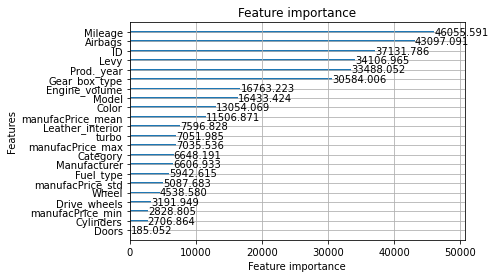

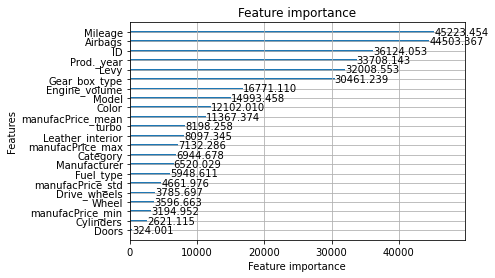

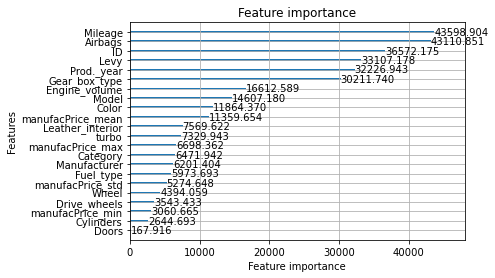

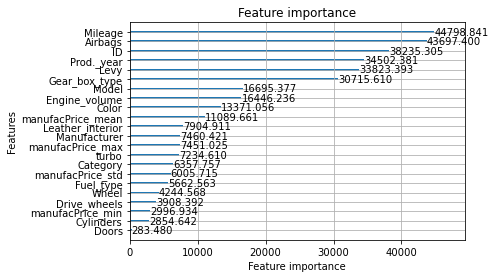

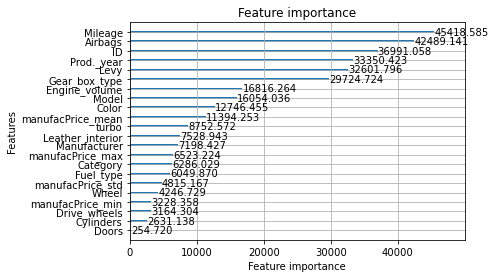

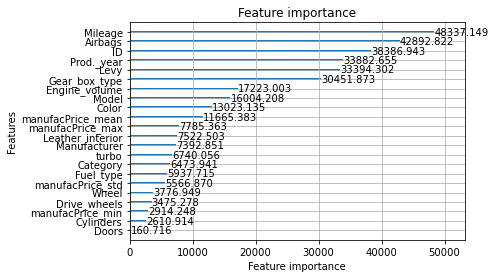

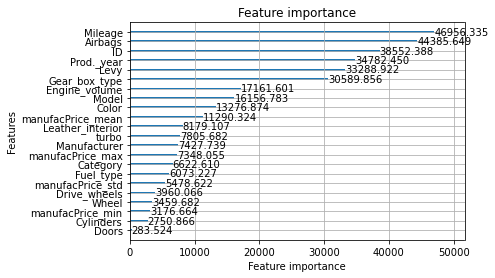

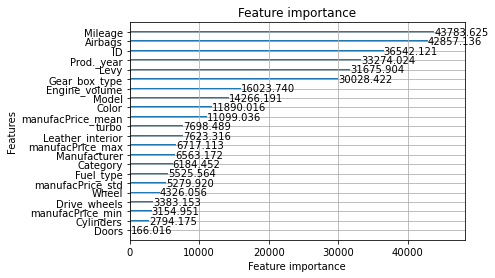

In [31]:
lgb_pred = lgb_model()

In [32]:
xgb_pred = xgb_model()

***********************************************************
[02:10:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score for fold 0 is 0.8694865395104517
[02:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score for fold 1 is 0.876402344244711
[02:10:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score for fold 2 is 0.8877379139351985
[02:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score for fold 3 is 0.8096683902819396
[02:11:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score for fold 4 is 0.8533952932225268
[02:11:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score for fold

In [33]:
cb_pred = catb_model()

***********************************************************
RMSLE score for fold 0 is 0.873851462745422
RMSLE score for fold 1 is 0.8797132277274431
RMSLE score for fold 2 is 0.8950482380172544
RMSLE score for fold 3 is 0.8135853716153925
RMSLE score for fold 4 is 0.865201722395859
RMSLE score for fold 5 is 0.8127112264417817
RMSLE score for fold 6 is 0.8791252088957061
RMSLE score for fold 7 is 0.8620050331497987

Avg score for all folds is 0.8601551863735821
***********************************************************

OOF Score after completing folds is 0.8606379093595435


In [34]:
# Converting each log transformed output to its original form
lgb_pred = np.expm1(lgb_pred)
xgb_pred = np.expm1(xgb_pred)
cb_pred = np.expm1(cb_pred)

In [35]:
lgb_pred

,Price
0,22866.384592
1,5902.819609
2,8503.567179
3,6383.848597
4,1280.951764
...,...
8240,7689.598286
8241,28500.647290
8242,262.669549
8243,41252.972632


In [36]:
xgb_pred

,Price
0,14409.825486
1,10624.521706
2,7549.800838
3,5297.207878
4,2906.752727
...,...
8240,8111.100408
8241,31964.186510
8242,278.029496
8243,37357.554970


In [37]:
cb_pred

,Price
0,26217.587383
1,8292.416210
2,8330.225680
3,3421.153177
4,2937.646088
...,...
8240,8502.338328
8241,32945.716035
8242,272.480023
8243,35659.437413


#### Combining results of xgboost and catboost to get a better result .
#### Tried various combinations , average of both perfomed better.

In [39]:
xgb_cb = xgb_pred*0.5 + cb_pred*0.5

In [40]:
xgb_cb

,Price
0,20313.706434
1,9458.468958
2,7940.013259
3,4359.180527
4,2922.199408
...,...
8240,8306.719368
8241,32454.951272
8242,275.254760
8243,36508.496192


In [41]:
xgb_cb.to_csv(r'C:\Machine Hack-mathco.thon\submissions\sub_end.csv', index=False)